In [20]:
# Import standard libraries
import pandas as pd
import numpy as np
import sys

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


sys.path.append('../src') 

from utils.data_loader import load_data



In [74]:
df=load_data("../data/MachineLearningRating_v3.txt",delimiter="|")

d:\projects\TenAcademy\week3\KAIM-WEEK-3\notebooks\../src\utils\data_loader.py:15: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, delimiter=delimiter)


Data loaded successfully from ../data/MachineLearningRating_v3.txt


1. Data Understanding 

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

1.2 DataType Rreview

From df.info() output:
Most numeric fields (int64, float64) look appropriate.
A few fields need conversion from object to proper types.
Some object fields are actually dates, booleans, or categoricals.

1.2.1 Convert Date Column

In [47]:
df["TransactionMonth"]

0          2015-03-01 00:00:00
1          2015-05-01 00:00:00
2          2015-07-01 00:00:00
3          2015-05-01 00:00:00
4          2015-07-01 00:00:00
                  ...         
1000093    2015-04-01 00:00:00
1000094    2015-06-01 00:00:00
1000095    2015-08-01 00:00:00
1000096    2014-07-01 00:00:00
1000097    2015-02-01 00:00:00
Name: TransactionMonth, Length: 1000098, dtype: object

In [76]:
df["TransactionMonth"] = pd.to_datetime(df["TransactionMonth"], errors='coerce')


1.2.2 Convert VehicleIntroDate to datetime

In [49]:
print(df["VehicleIntroDate"])

0                          6/2002
1                          6/2002
2                          6/2002
3                          6/2002
4                          6/2002
                    ...          
1000093    2013/01/01 12:00:00 AM
1000094    2013/01/01 12:00:00 AM
1000095    2013/01/01 12:00:00 AM
1000096    2013/01/01 12:00:00 AM
1000097    2013/01/01 12:00:00 AM
Name: VehicleIntroDate, Length: 1000098, dtype: object


In [77]:
from utils.clean_data import clean_vehicle_intro_date

df["VehicleIntroDate"] = df["VehicleIntroDate"].apply(clean_vehicle_intro_date)


In [51]:
df["VehicleIntroDate"]

0         2002-06-01
1         2002-06-01
2         2002-06-01
3         2002-06-01
4         2002-06-01
             ...    
1000093   2013-01-01
1000094   2013-01-01
1000095   2013-01-01
1000096   2013-01-01
1000097   2013-01-01
Name: VehicleIntroDate, Length: 1000098, dtype: datetime64[ns]

1.3 Convert to Boolean 

In [78]:
for col in ["AlarmImmobiliser", "TrackingDevice", "CapitalOutstanding", "NewVehicle", "WrittenOff", "Rebuilt", "Converted"]:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())



Unique values in 'AlarmImmobiliser':
['Yes' 'No']

Unique values in 'TrackingDevice':
['No' 'Yes']

Unique values in 'CapitalOutstanding':
[119300 161000 52700 ... 312900.0 13700.0 184500.0]

Unique values in 'NewVehicle':
['More than 6 months' nan 'Less than 6 months']

Unique values in 'WrittenOff':
[nan 'No' 'Yes']

Unique values in 'Rebuilt':
[nan 'No' 'Yes']

Unique values in 'Converted':
[nan 'No' 'Yes']


In [79]:
yes_no_mapping = {"Yes": True, "No": False}

for col in ["AlarmImmobiliser", "TrackingDevice", "WrittenOff", "Rebuilt", "Converted"]:
    df[col] = df[col].map(yes_no_mapping)


Convert to category

In [80]:
cat_cols = [
    "Province", "VehicleType", "make", "Model", "bodytype",
    "CoverType", "CoverCategory", "CoverGroup", "Product",
    "StatutoryClass", "StatutoryRiskType", "TermFrequency", "Section"
]


for col in cat_cols:
    print(f"\nColumn: {col}")
    print(f"Unique values ({df[col].nunique()}):")
    print(df[col].unique()[:10])  # Show first 10 unique values to avoid flooding



Column: Province
Unique values (9):
['Gauteng' 'KwaZulu-Natal' 'Mpumalanga' 'Eastern Cape' 'Western Cape'
 'Limpopo' 'North West' 'Free State' 'Northern Cape']

Column: VehicleType
Unique values (5):
['Passenger Vehicle' 'Medium Commercial' 'Heavy Commercial'
 'Light Commercial' 'Bus' nan]

Column: make
Unique values (46):
['MERCEDES-BENZ' 'VOLKSWAGEN' 'RENAULT' 'FORD' 'BMW' 'AUDI' 'VOLVO'
 'PROTON' 'TOYOTA' 'NISSAN/DATSUN                      ']

Column: Model
Unique values (411):
['E 240' 'TOUAREG 5.0 V10 TDI TIP' 'SCENIC 1.9 dCi EXPRESSION'
 'TERRITORY 4.0i GHIA AWD A/T' '320i (E90)' 'FIESTA 1.6 SPORT 5Dr'
 'A4 1.8T ATTRACTION (B8)' 'S40 T5 A/T' 'SAVVY 1.2 SPORT' 'GEN 2 1.6 GL']

Column: bodytype
Unique values (13):
['S/D' 'SUV' 'MPV' 'H/B' 'P/V' 'B/S' 'S/W' 'C/C' 'D/C' 'D/S']

Column: CoverType
Unique values (22):
['Windscreen' 'Own Damage' 'Third Party' 'Passenger Liability'
 'Signage and Vehicle Wraps' 'Keys and Alarms'
 'Cleaning and Removal of Accident Debris' 'Emergency Charg

In [81]:
for col in cat_cols:
    df[col] = df[col].astype("category")

Let's check the number of unique values in other object cols and see if we can convert it to category type

In [82]:
# List object dtype columns
object_cols = df.select_dtypes(include='object').columns.tolist()

# For each, get unique value counts
for col in object_cols:
    unique_count = df[col].nunique(dropna=True)
    total_count = len(df)
    print(f"Column: {col}, Unique values: {unique_count}, Percent unique: {unique_count/total_count:.4%}")


Column: Citizenship, Unique values: 4, Percent unique: 0.0004%
Column: LegalType, Unique values: 6, Percent unique: 0.0006%
Column: Title, Unique values: 5, Percent unique: 0.0005%
Column: Language, Unique values: 1, Percent unique: 0.0001%
Column: Bank, Unique values: 11, Percent unique: 0.0011%
Column: AccountType, Unique values: 3, Percent unique: 0.0003%
Column: MaritalStatus, Unique values: 3, Percent unique: 0.0003%
Column: Gender, Unique values: 3, Percent unique: 0.0003%
Column: Country, Unique values: 1, Percent unique: 0.0001%
Column: MainCrestaZone, Unique values: 16, Percent unique: 0.0016%
Column: SubCrestaZone, Unique values: 45, Percent unique: 0.0045%
Column: ItemType, Unique values: 1, Percent unique: 0.0001%
Column: CapitalOutstanding, Unique values: 1011, Percent unique: 0.1011%
Column: NewVehicle, Unique values: 2, Percent unique: 0.0002%
Column: WrittenOff, Unique values: 2, Percent unique: 0.0002%
Column: Rebuilt, Unique values: 2, Percent unique: 0.0002%
Column: 

In [83]:
cols_to_cat = [
    "Citizenship", "LegalType", "Title",  "Bank", "AccountType",
    "MaritalStatus", "Gender",  "MainCrestaZone", "SubCrestaZone",
   "NewVehicle", "WrittenOff", "Rebuilt", "Converted",
    "CrossBorder", "ExcessSelected"
]

for col in cols_to_cat:
    df[col] = df[col].astype('category')


 Clean and convert CapitalOutstanding to numeric

In [84]:
df['CapitalOutstanding'] = pd.to_numeric(df['CapitalOutstanding'], errors='coerce')
print(f"CapitalOutstanding dtype after conversion: {df['CapitalOutstanding'].dtype}")


CapitalOutstanding dtype after conversion: float64


In [59]:
df.dtypes

UnderwrittenCoverID                  int64
PolicyID                             int64
TransactionMonth            datetime64[ns]
IsVATRegistered                       bool
Citizenship                       category
LegalType                         category
Title                             category
Language                            object
Bank                              category
AccountType                       category
MaritalStatus                     category
Gender                            category
Country                             object
Province                          category
PostalCode                           int64
MainCrestaZone                    category
SubCrestaZone                     category
ItemType                            object
mmcode                             float64
VehicleType                       category
RegistrationYear                     int64
make                              category
Model                             category
Cylinders  

2. Missing Values Check

In [85]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    "Missing Count": missing,
    "Missing Percentage": missing_percent
}).sort_values(by="Missing Percentage", ascending=False)

print(missing_df[missing_df["Missing Count"] > 0])

                         Missing Count  Missing Percentage
NumberOfVehiclesInFleet        1000098          100.000000
CrossBorder                     999400           99.930207
CustomValueEstimate             779642           77.956560
Rebuilt                         641901           64.183810
Converted                       641901           64.183810
WrittenOff                      641901           64.183810
NewVehicle                      153295           15.327998
Bank                            145961           14.594670
AccountType                      40232            4.022806
Gender                            9536            0.953507
MaritalStatus                     8259            0.825819
VehicleType                        552            0.055195
make                               552            0.055195
mmcode                             552            0.055195
Model                              552            0.055195
Cylinders                          552            0.0551

1. Drop cols with hight percentage of missing values

In [86]:
# Drop completely empty or near-empty columns
df.drop(columns=["NumberOfVehiclesInFleet", "CrossBorder",'CustomValueEstimate'], inplace=True)

2. Categorical Columns with few missing (≤15%)

In [87]:
# fill with 'Unknown'
cat_fill_unknown = ['Bank', 'AccountType', 'NewVehicle']

for col in cat_fill_unknown:
    if 'Unknown' not in df[col].cat.categories:
        df[col] = df[col].cat.add_categories('Unknown')
    df[col] = df[col].fillna('Unknown')


3. Yes/No columns with many missing values

In [88]:
for col in ['Converted', 'WrittenOff', 'Rebuilt']:
    df[col] = df[col].fillna(False)

4.  Impute with mode — low-miss categorical

In [89]:
for col in ['Gender', 'MaritalStatus']:
    df[col] = df[col].fillna(df[col].mode()[0])


5. Drop rows — small % of data

In [90]:
df.dropna(subset=[
    'make', 'Model', 'mmcode', 'Cylinders', 'cubiccapacity',
    'kilowatts', 'bodytype', 'VehicleType', 'VehicleIntroDate',
    'NumberOfDoors'
], inplace=True)


6. Fill missing values in numeric with 0

In [92]:
df['CapitalOutstanding'] = df['CapitalOutstanding'].fillna(0)

In [93]:
df.isna().sum()

UnderwrittenCoverID         0
PolicyID                    0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
Title                       0
Language                    0
Bank                        0
AccountType                 0
MaritalStatus               0
Gender                      0
Country                     0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
ItemType                    0
mmcode                      0
VehicleType                 0
RegistrationYear            0
make                        0
Model                       0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
bodytype                    0
NumberOfDoors               0
VehicleIntroDate            0
AlarmImmobiliser            0
TrackingDevice              0
CapitalOutstanding          0
NewVehicle                  0
WrittenOff

3. Check for duplicate rows

In [95]:
print("Duplicates:", df.duplicated().sum())


Duplicates: 74


In [96]:
df = df.drop_duplicates()

# Confirm duplicates are removed
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")

Number of duplicate rows after removal: 0


## EDA Sumary

I performed exploratory data analysis on the car insurance claims dataset to understand the data distribution and quality. I examined the data types and unique values, identifying categorical, numerical, and boolean features. Missing data analysis revealed some columns with very high missingness, such as CustomValueEstimate, which I dropped to maintain data integrity. For columns with moderate missing values, I applied sensible imputations — for example, filling boolean flags with False and categorical variables with a new category "Unknown". This cleaning step ensures the dataset is ready for further analysis and modeling while preserving meaningful information. I have also removed 74 duplicate values

Statistical thinking

In [97]:
df.describe()

,UnderwrittenCoverID,PolicyID,TransactionMonth,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,VehicleIntroDate,CapitalOutstanding,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,999472.000000,999472.000000,999472,999472.000000,9.994720e+05,999472.000000,999472.000000,999472.000000,999472.000000,999472.000000,999472,999472.000000,9.994720e+05,999472.000000,999472.000000,999472.000000
mean,104803.903254,7955.791751,2015-02-28 10:26:10.659708672,3019.531407,5.487732e+07,2010.225276,4.046646,2466.726433,97.206898,4.019251,2008-04-20 17:22:23.422928128,52621.221232,6.038739e+05,116.163080,61.376816,64.344834
min,1.000000,14.000000,2013-10-01 00:00:00,1.000000,4.041200e+06,1987.000000,0.000000,0.000000,0.000000,0.000000,1977-10-01 00:00:00,-2.000000,1.000000e-02,0.000000,-782.576754,-12002.412281
25%,55127.000000,4500.000000,2015-01-01 00:00:00,821.000000,6.005692e+07,2008.000000,4.000000,2237.000000,75.000000,4.000000,2007-11-01 00:00:00,0.000000,5.000000e+03,3.225700,0.000000,0.000000
50%,94069.000000,7070.000000,2015-04-01 00:00:00,2000.000000,6.005842e+07,2011.000000,4.000000,2694.000000,111.000000,4.000000,2010-10-01 00:00:00,0.000000,7.500000e+03,8.436900,2.179737,0.000000
75%,139191.000000,11077.000000,2015-06-01 00:00:00,4171.000000,6.005842e+07,2013.000000,4.000000,2694.000000,111.000000,4.000000,2012-04-01 00:00:00,0.000000,2.500000e+05,90.000000,21.929825,0.000000
max,301175.000000,23246.000000,2015-08-01 00:00:00,9870.000000,6.506535e+07,2015.000000,10.000000,12880.000000,309.000000,6.000000,2014-09-01 00:00:00,700000.000000,1.000000e+07,3051.821100,2253.507281,393092.105263
std,63299.055320,5290.122346,NaN,2649.217715,1.360424e+07,3.261150,0.294031,442.812714,19.393610,0.468332,NaN,111430.355997,1.507344e+06,220.579741,157.018881,2369.652370


# **Univariate Analysis**

1. Histograms for numerical columns

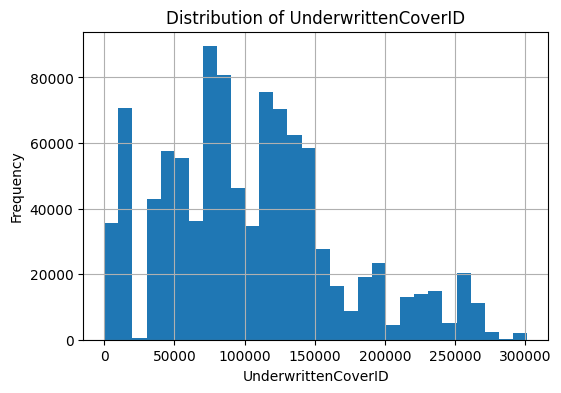

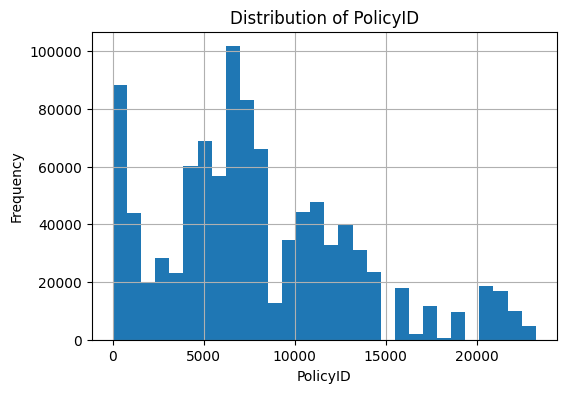

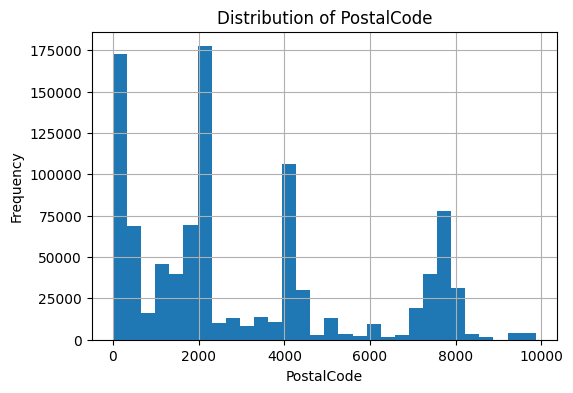

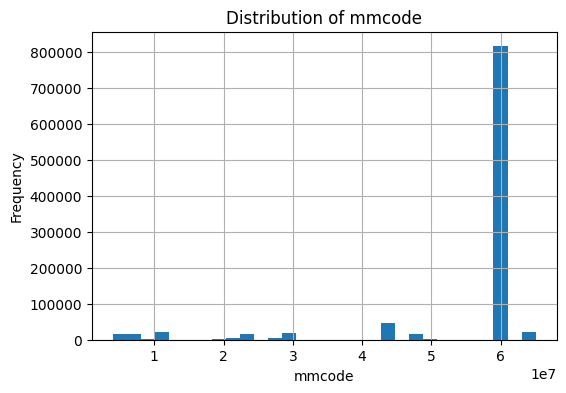

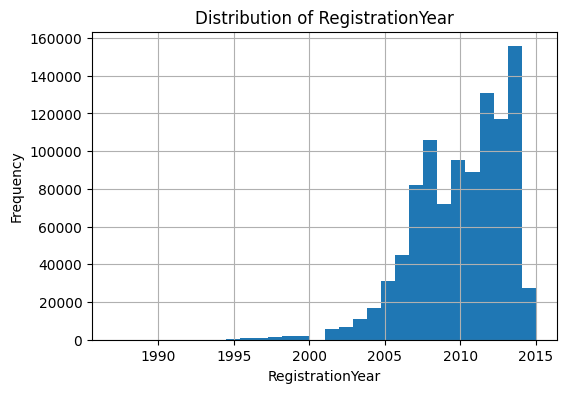

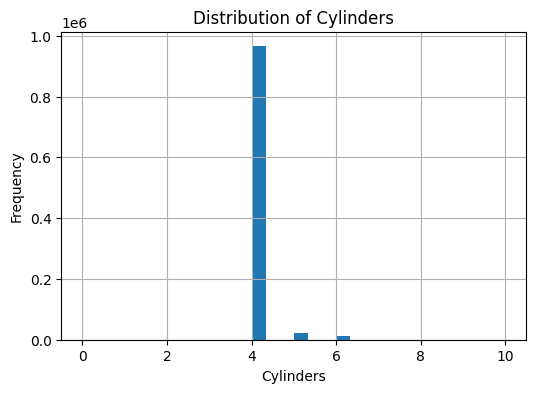

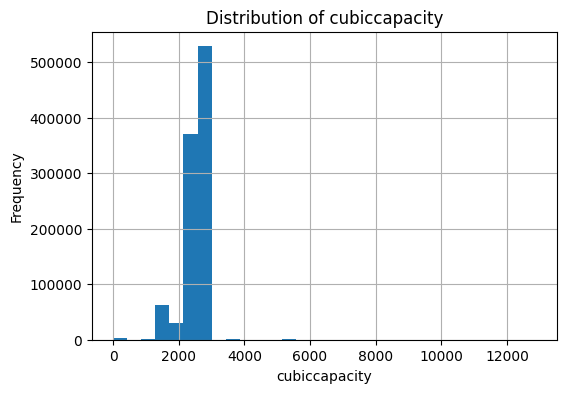

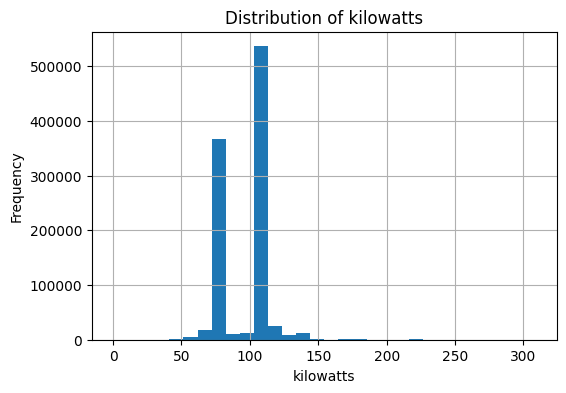

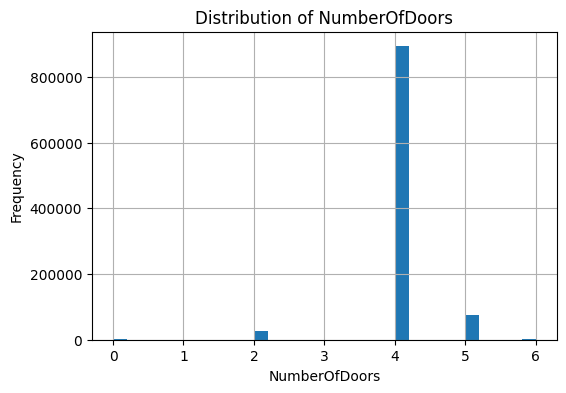

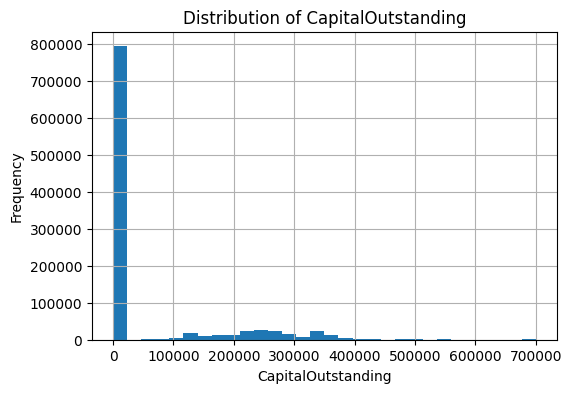

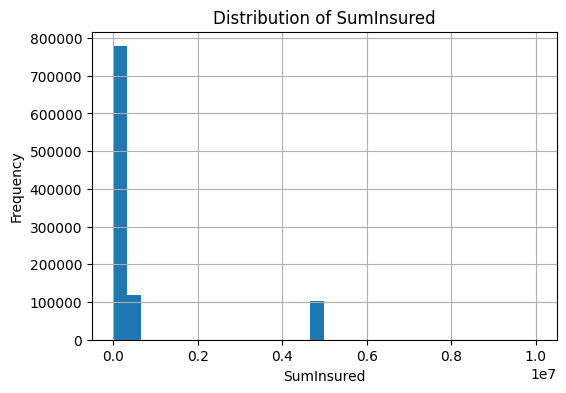

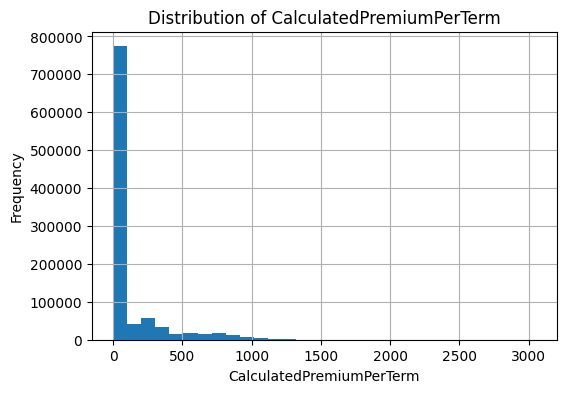

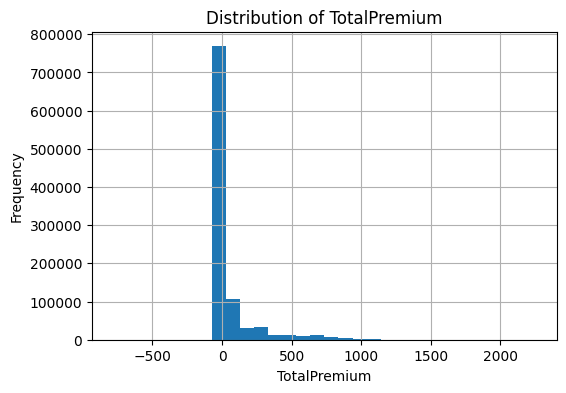

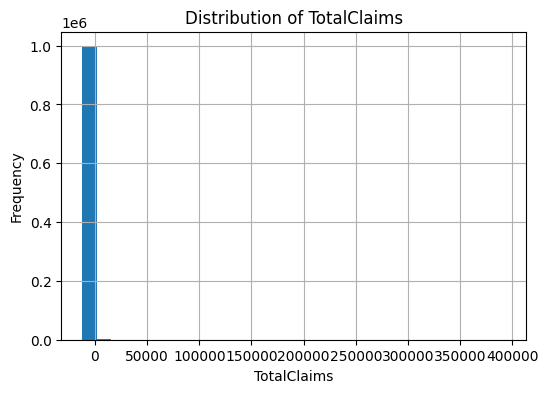

In [99]:

# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms
for col in num_cols:
    plt.figure(figsize=(6,4))
    df[col].hist(bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


2. Bar charts for categorical columns

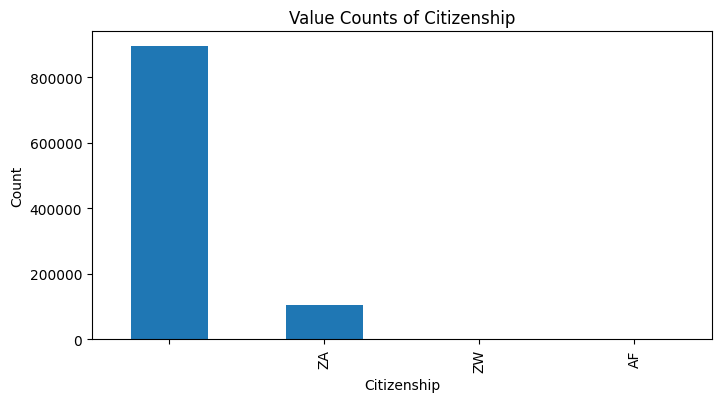

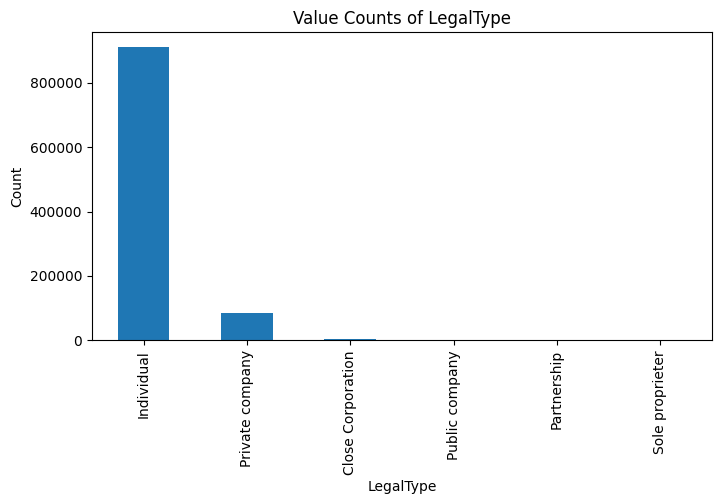

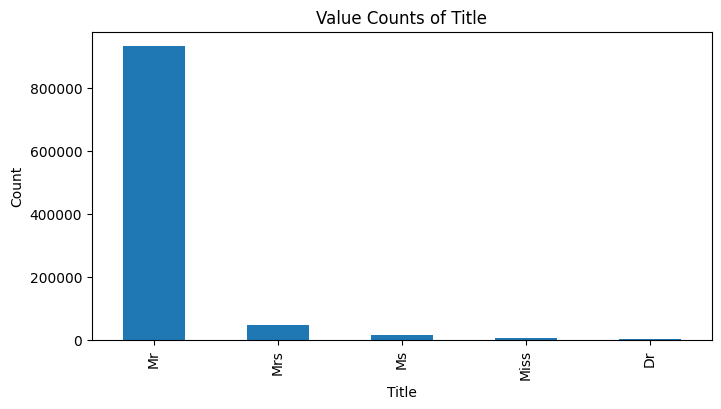

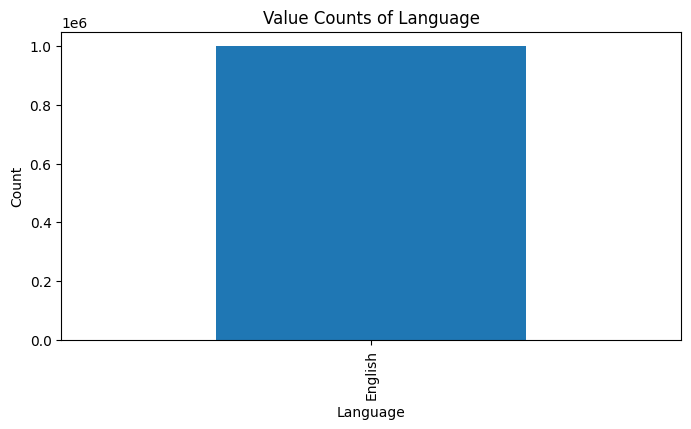

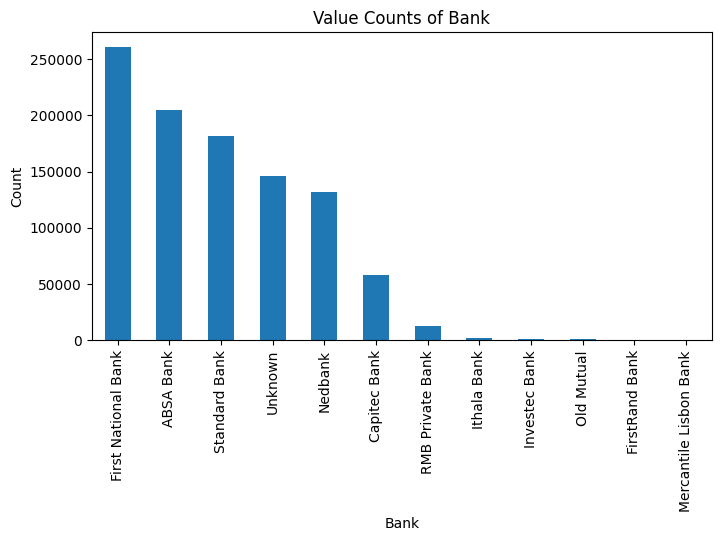

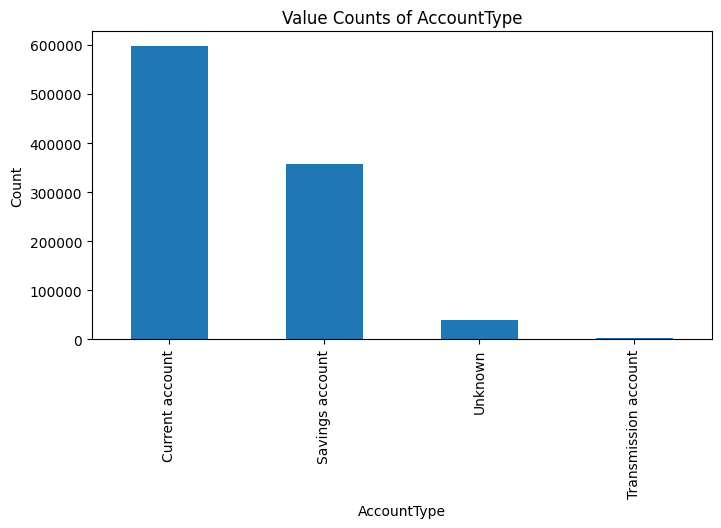

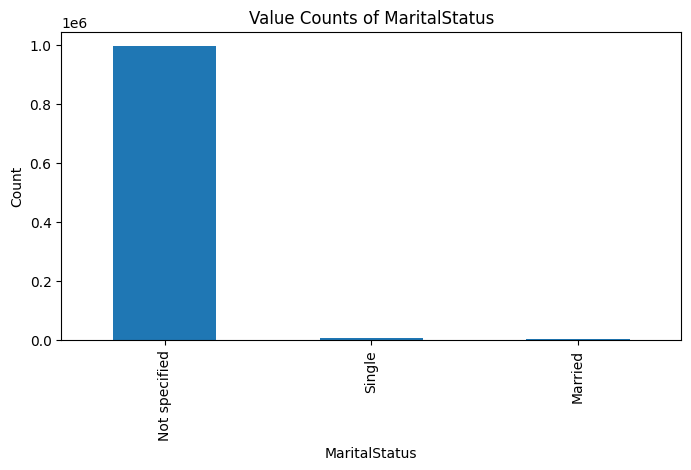

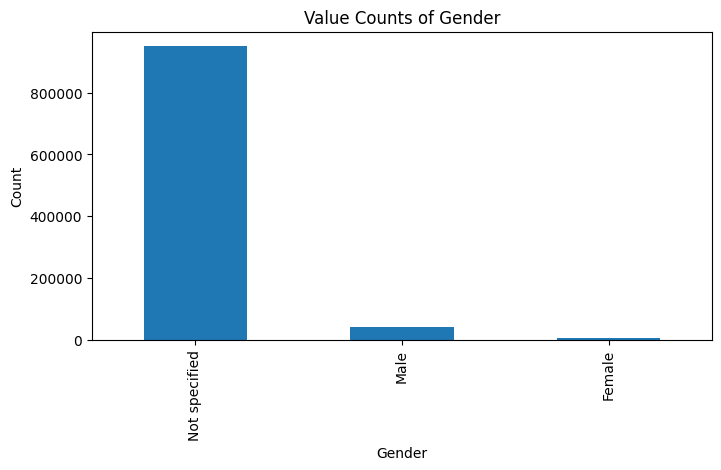

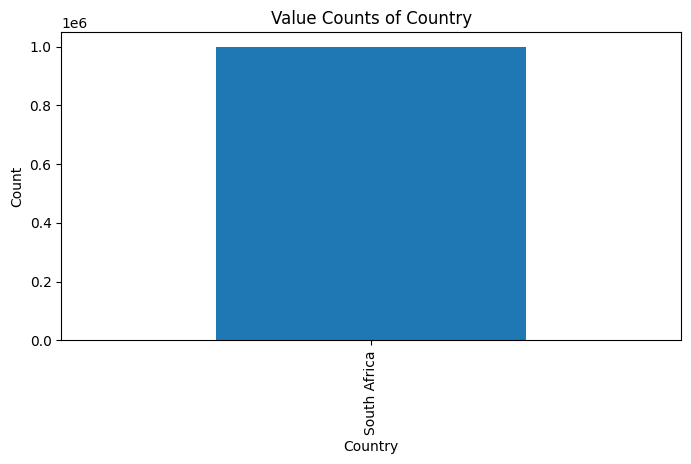

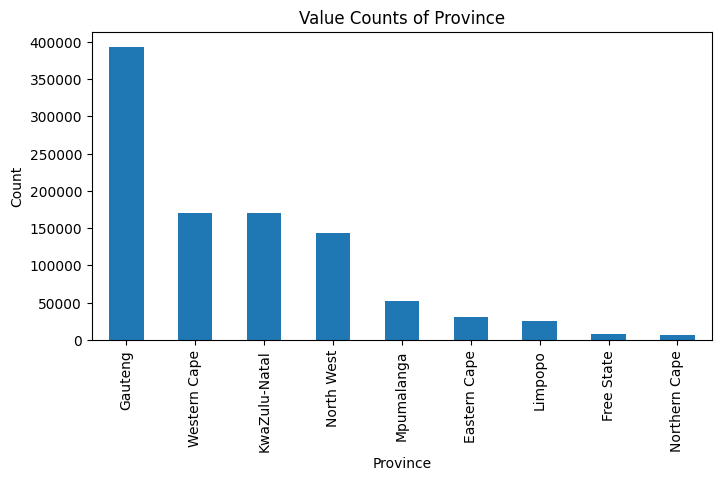

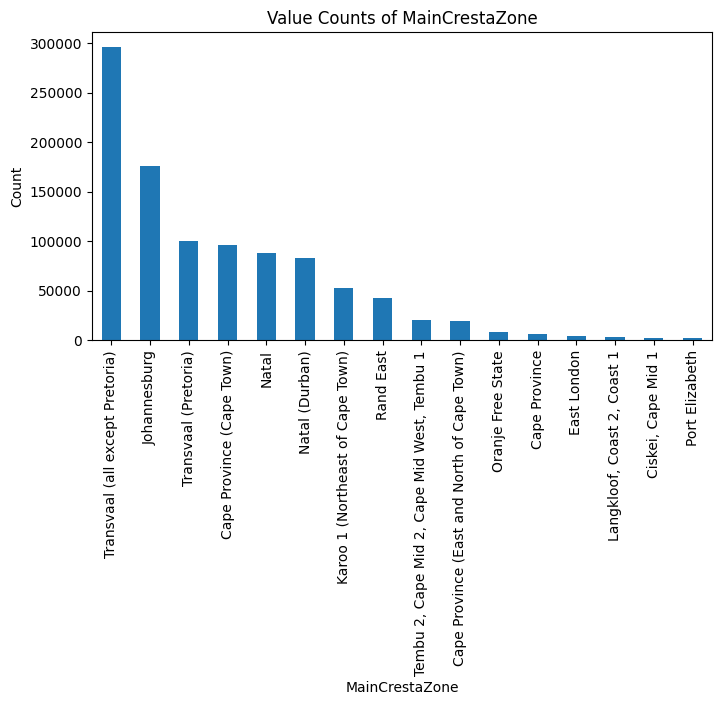

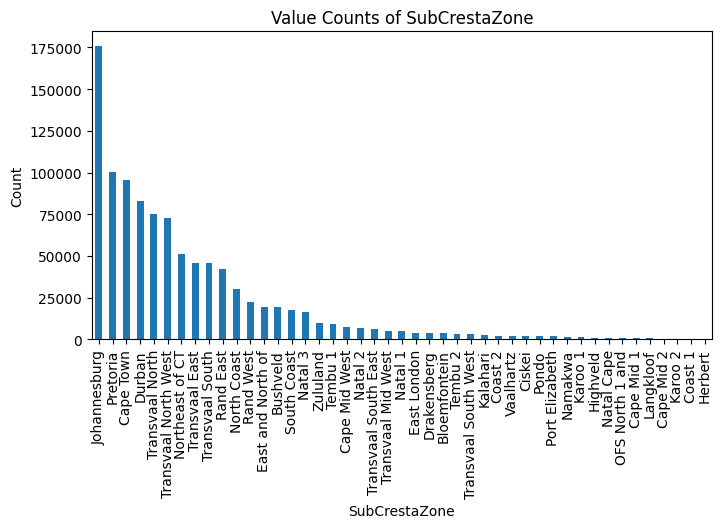

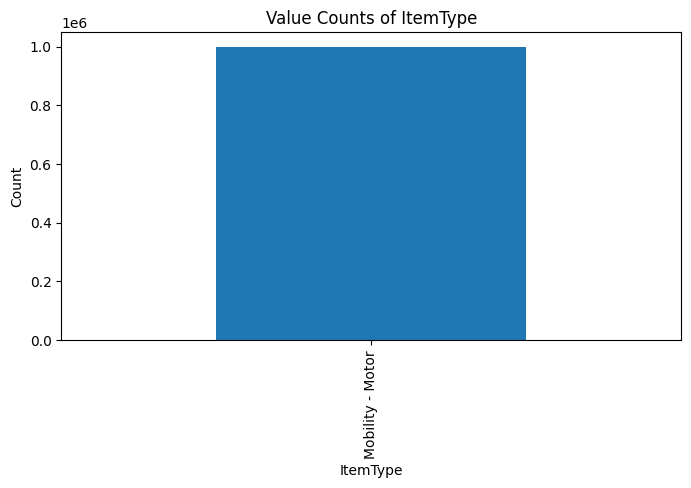

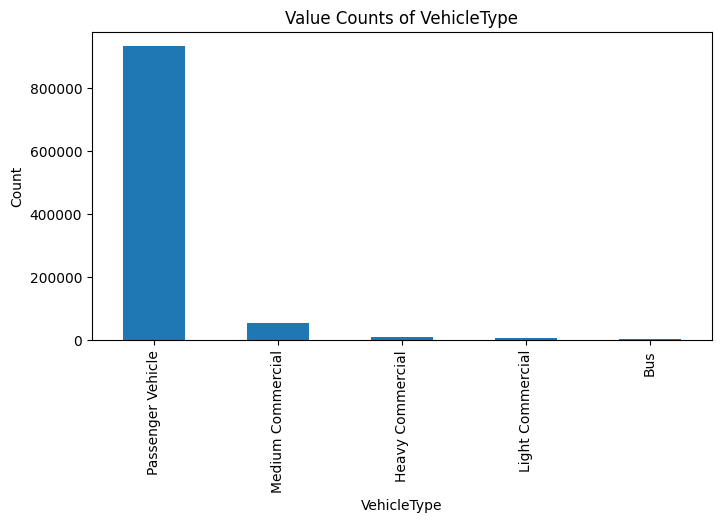

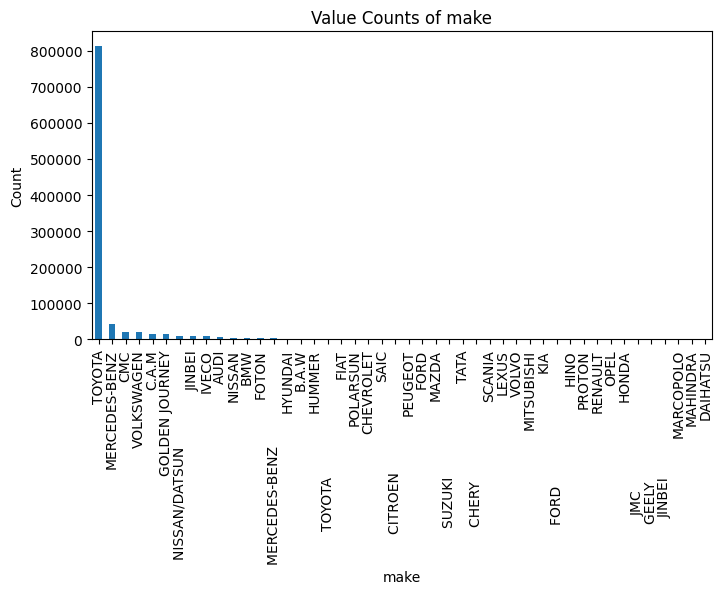

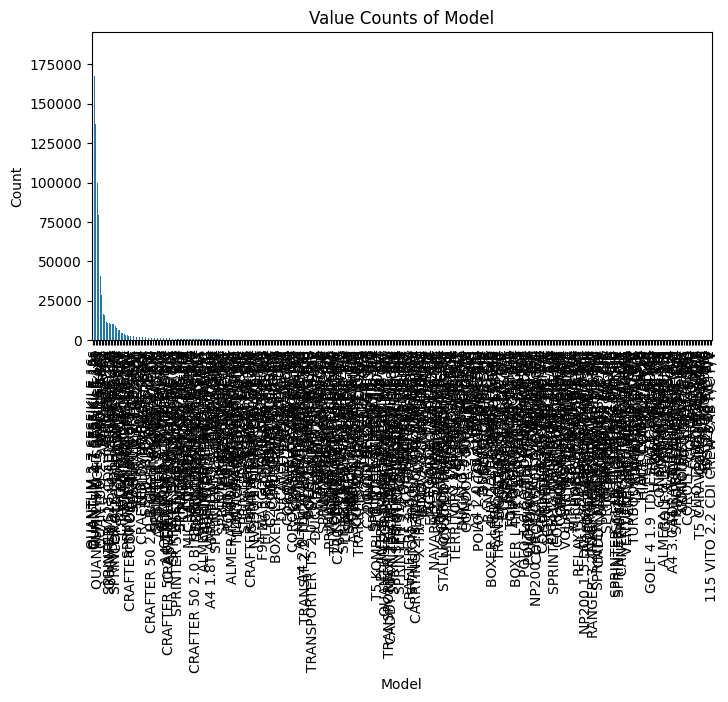

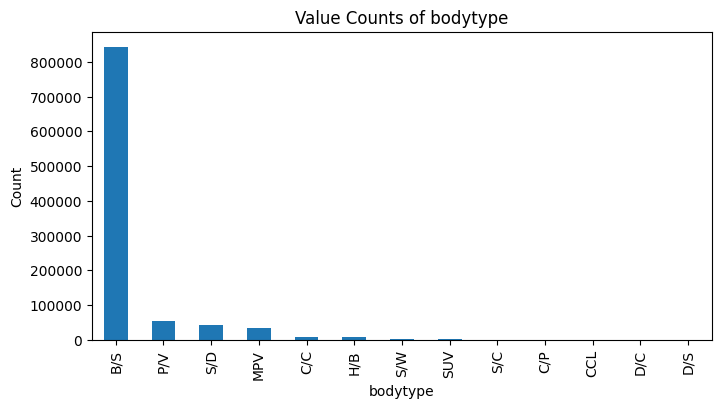

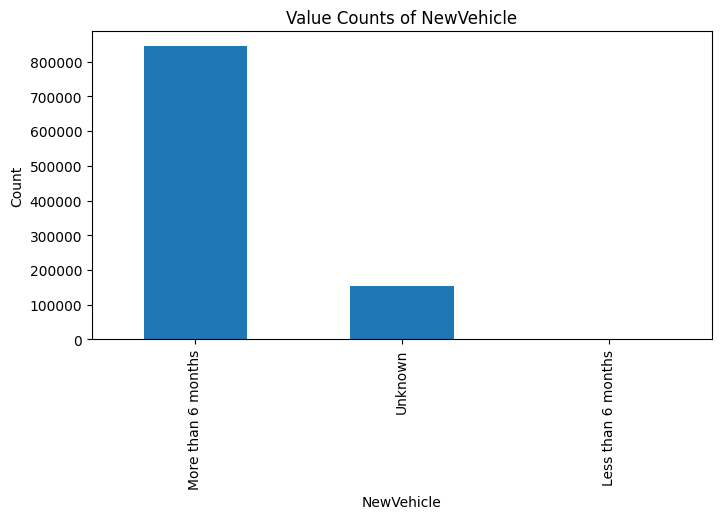

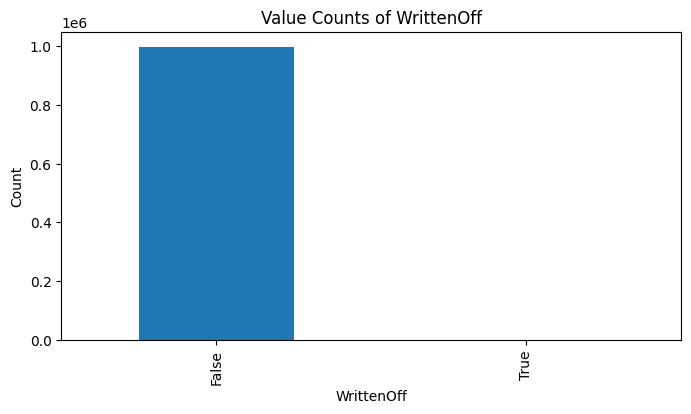

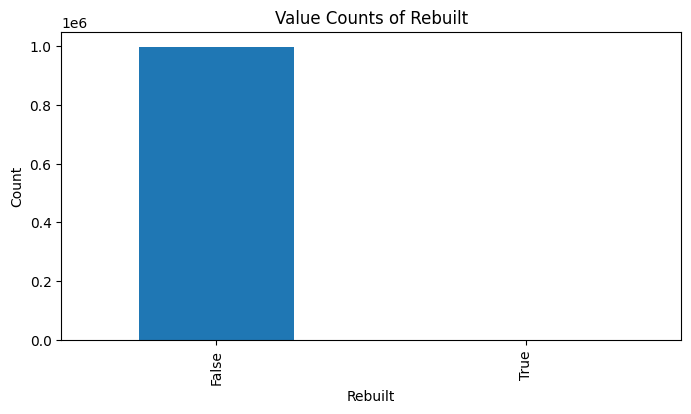

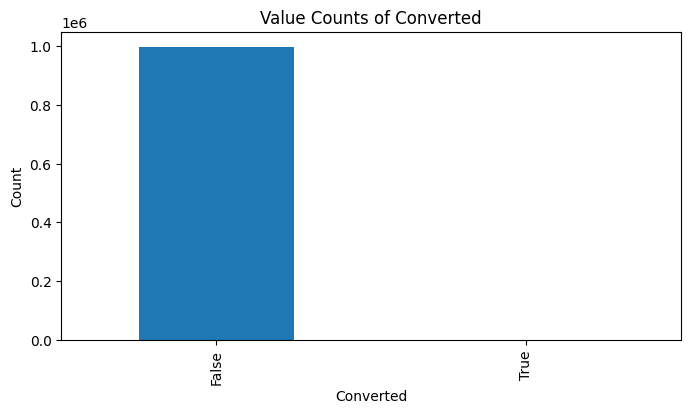

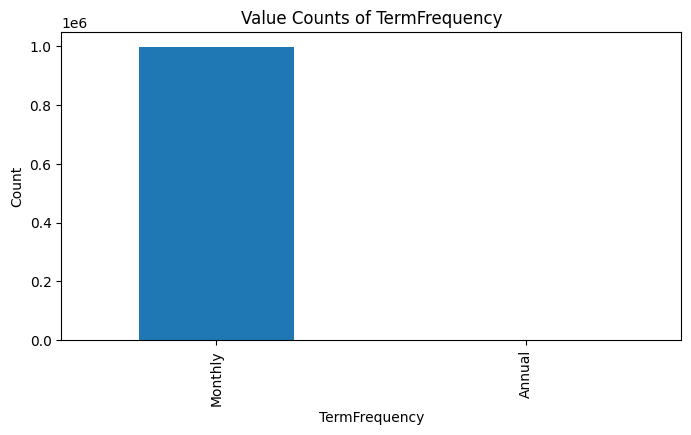

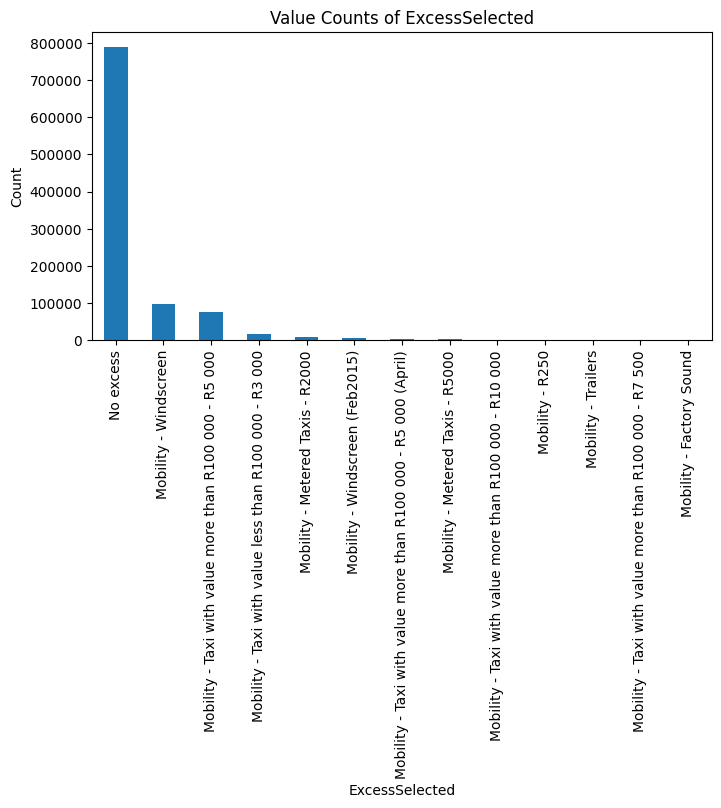

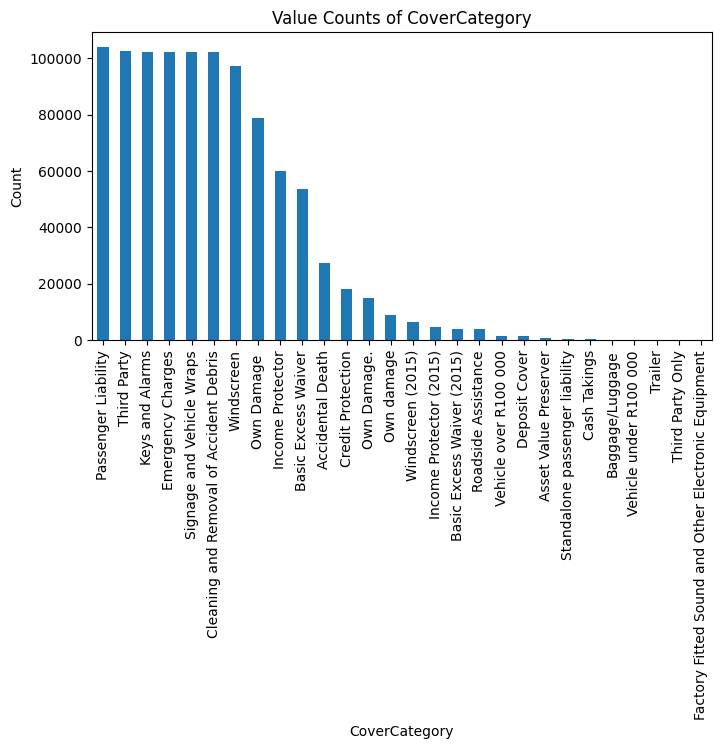

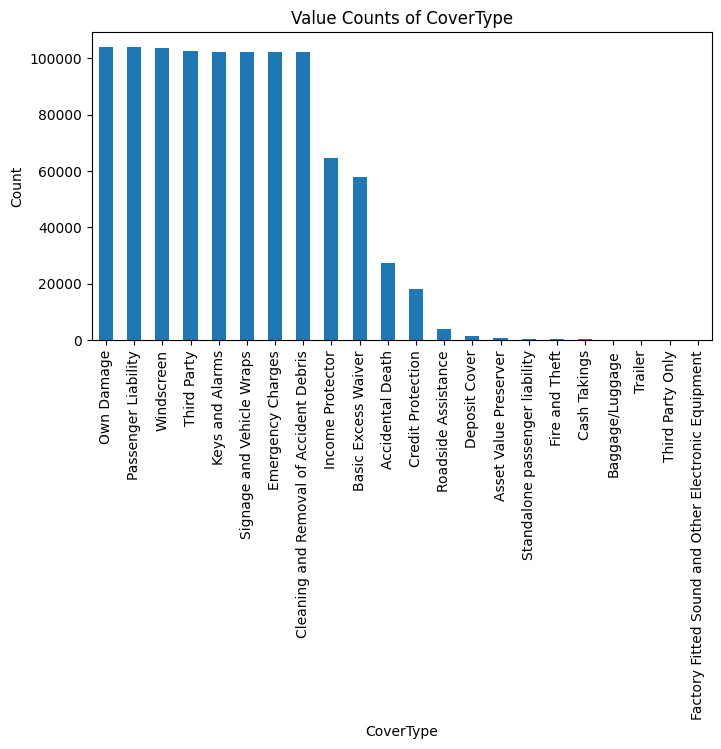

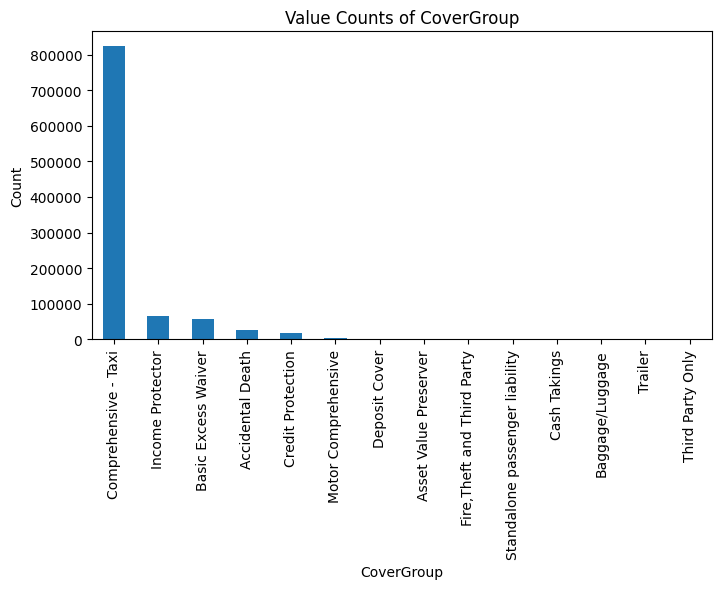

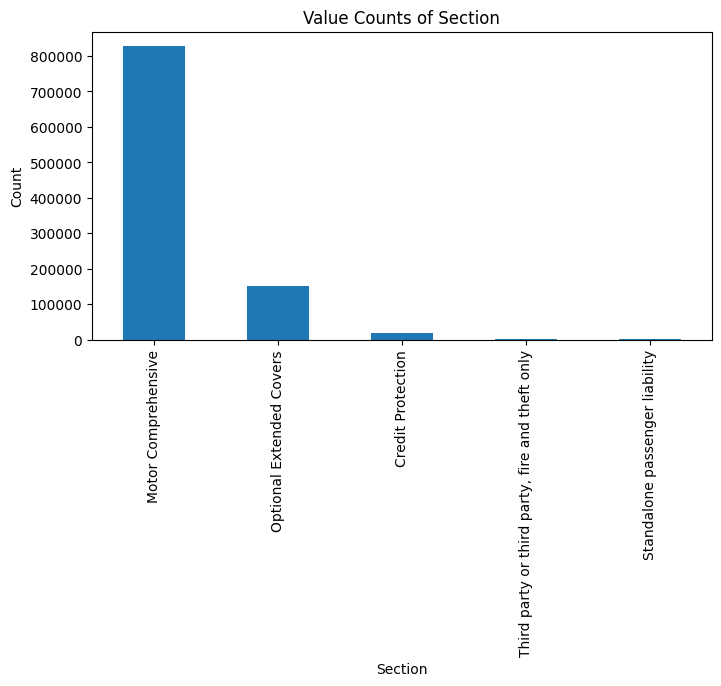

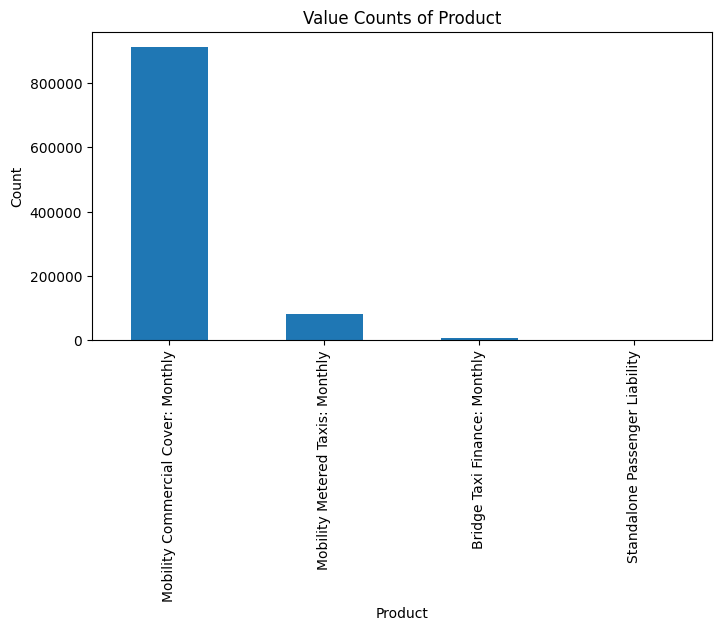

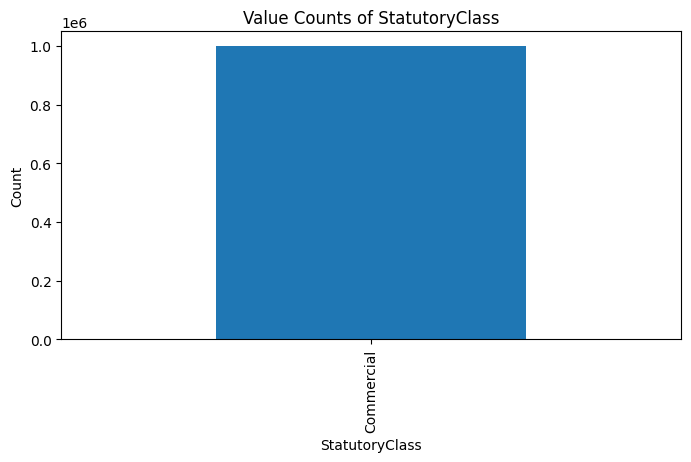

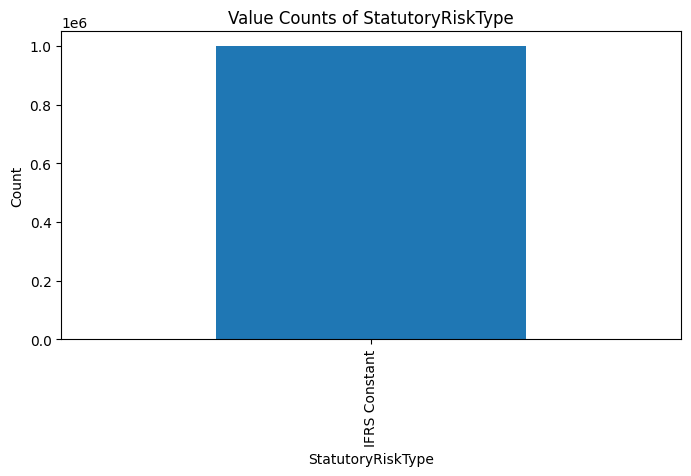

In [100]:
# Select categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Plot bar charts
for col in cat_cols:
    plt.figure(figsize=(8,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Value Counts of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


# **Bivariate or Multivariate Analysis**

1. Correlation Matrix for numerical variables

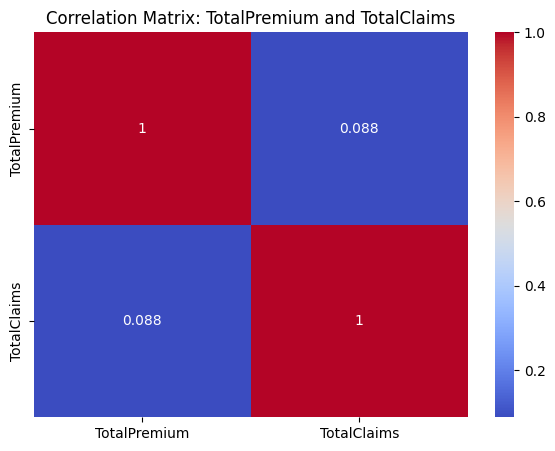

In [104]:

# Select numerical columns including TotalPremium and TotalClaims
num_cols = ['TotalPremium', 'TotalClaims']

# Calculate correlation matrix
corr = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: TotalPremium and TotalClaims')
plt.show()


2. Scatter plot of TotalPremium vs TotalClaims colored by PostalCode

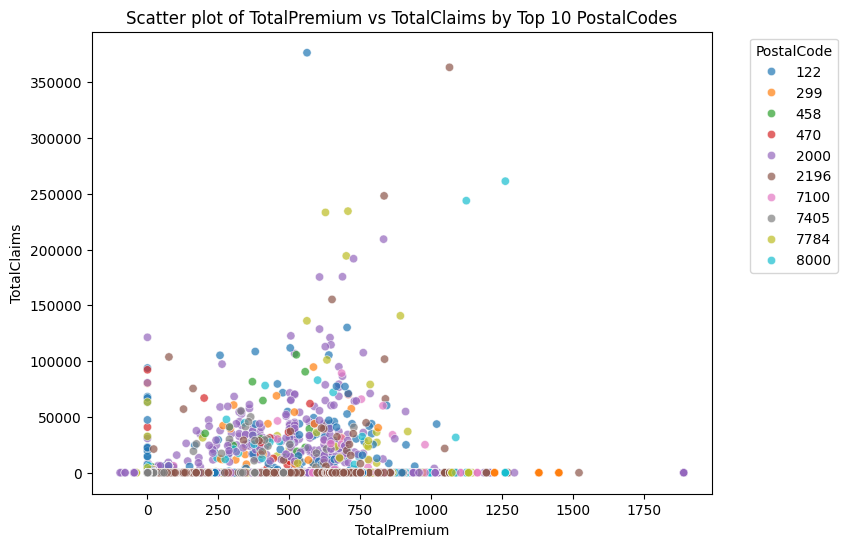

In [ ]:
#  Top N Postal Codes by Frequency
top_postal_codes = df['PostalCode'].value_counts().nlargest(10).index
df_top = df[df['PostalCode'].isin(top_postal_codes)]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_top, x='TotalPremium', y='TotalClaims', hue='PostalCode', palette='tab10', alpha=0.7)
plt.title('Scatter plot of TotalPremium vs TotalClaims by Top 10 PostalCodes')
plt.xlabel('TotalPremium')
plt.ylabel('TotalClaims')
plt.legend(title='PostalCode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [112]:
group_corr = df.groupby('PostalCode')[['TotalPremium', 'TotalClaims']].corr().iloc[0::2,-1]

print(group_corr)


PostalCode              
1           TotalPremium    0.088382
2           TotalPremium    0.133329
4           TotalPremium         NaN
5           TotalPremium    0.231482
6           TotalPremium    0.205668
                              ...   
9781        TotalPremium   -0.019394
9830        TotalPremium         NaN
9868        TotalPremium         NaN
9869        TotalPremium   -0.005155
9870        TotalPremium         NaN
Name: TotalClaims, Length: 888, dtype: float64
